# Lektion 14

Beachten Sie die Hinweise zum Ablauf der Klausur: http://compana.ruediger-braun.net/?p=396

In [43]:
from sympy import *
init_printing()
import matplotlib.pyplot as plt
#%matplotlib notebook
%matplotlib inline
import numpy as np

## Eine Bernoullische Differentialgleichung

In [2]:
x = Symbol('x')
y = Function('y')
dgl = Eq(y(x).diff(x), sqrt(x*y(x)))
dgl

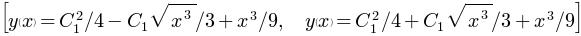

In [3]:
Lsg = dsolve(dgl)
Lsg

In [5]:
f1 = Lsg[0].rhs
f2 = Lsg[1].rhs

In [6]:
C1 = Symbol('C1')

In [7]:
C_1 = Symbol('C1')

In [8]:
C1 is C_1

True

`Symbol('C1')` ist ein Singleton.

In [9]:
w = S(1)/50

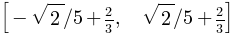

In [10]:
gl1 = Eq(f1.subs(x, 1), w)
L1 = solve(gl1)
L1

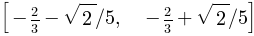

In [11]:
gl2 = Eq(f2.subs(x, 1), w)
L2 = solve(gl2)
L2

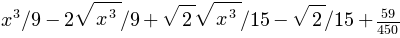

In [12]:
phi1 = f1.subs(C1, L1[0]).expand()
phi1

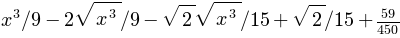

In [13]:
phi2 = f1.subs(C1, L1[1]).expand()
phi2

In [14]:
(phi1 - f2.subs(C1, L2[1])).expand()

In [15]:
xn = np.linspace(0, 1.5)
pn1 = lambdify(x, phi1, 'numpy')
pn2 = lambdify(x, phi2, 'numpy')
wn1 = pn1(xn)
wn2 = pn2(xn)

<IPython.core.display.Javascript object>


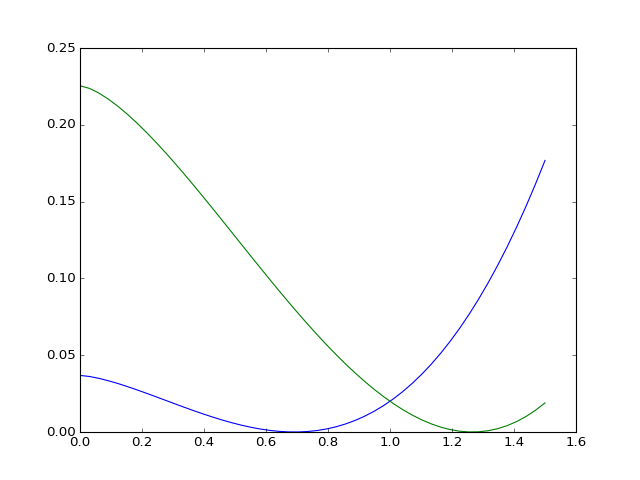

In [17]:
plt.plot(xn, wn1)
plt.plot(xn, wn2);

**Satz von Picard-Lindelöf:**

Sei $U \subseteq \mathbb R \times \mathbb R^n$ offen, sei
$f \colon U \to \mathbb R$ stetig (in beiden Argumenten) und lokal
Lipschitz-stetig im zweiten Argument, und sei $(x_0, y_0) \in U$.
Dann existieren ein offenes Intervall $I$ mit $x_0 \in I$ und
eine Lösung $\phi \colon I \to \mathbb R^n$ der Differentialgleichung
$y' = f(x,y)$ mit folgenden Eigenschaften

1. $\phi(x_0) = y_0$.
1. Ist $\psi \colon J \to \mathbb R^n$ ebenfalls eine Lösung der
  Differentialgleichung $y' = f(x,y)$ mit $\psi(x_0)=y_0$,
    so gelten $J \subseteq I$ und $\psi = \phi|_J$.

In [18]:
vn = lambdify((x,y(x)), dgl.rhs, 'numpy')
vn(4, 9)

In [19]:
xq = np.linspace(0, 1.5, 13)
yq = np.linspace(0, .1, 11)
X, Y = np.meshgrid(xq, yq)
U = np.ones_like(X)
V = vn(X,Y).astype(float)

<IPython.core.display.Javascript object>


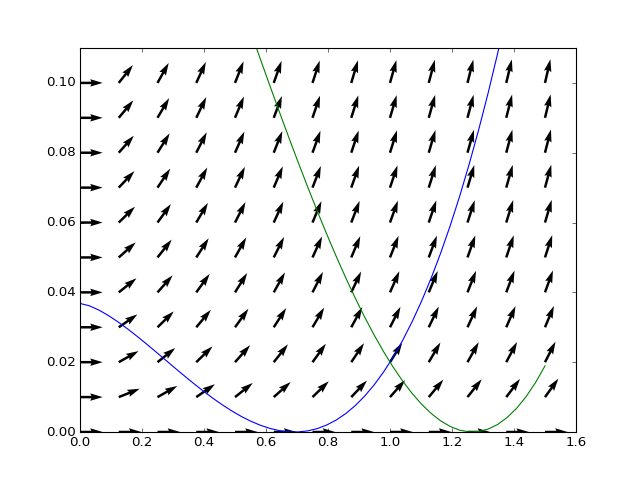

In [20]:
plt.quiver(X, Y, U, V, angles='xy')
plt.plot(xn, wn1)
plt.plot(xn, wn2)
plt.axis(ymax=.11);

## Lösung durch Zurückführen auf lineare Differentialgleichung

In [21]:
alpha = Rational(1,2)
beta = 1/(1-alpha)
beta

Ansatz

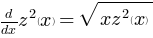

In [22]:
z = Function('z')
dgl1 = dgl.subs(y(x), z(x)**beta)
dgl1

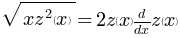

In [23]:
dgl2 = dgl1.doit().simplify()
dgl2

In [24]:
dgl3 = dgl2.subs(sqrt(x*z(x)**2), sqrt(x)*z(x))
dgl3

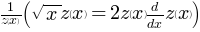

In [26]:
dgl4 = dgl3/z(x)
dgl4

In [27]:
dgl4 = Eq(dgl3.lhs/z(x), dgl3.rhs/z(x))
dgl4

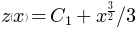

In [28]:
Lsg = dsolve(dgl4)
Lsg

In [29]:
g = Lsg.rhs**beta
g

Das gilt aber nur da, wo die Basis positiv ist.

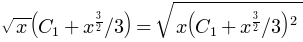

In [30]:
dgl.subs(y(x), g).doit()

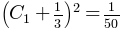

In [31]:
gl = Eq(g.subs(x,1), w)
gl

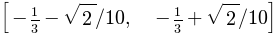

In [32]:
L = solve(gl)
L

Im ersten Fall ist $C_1 + \frac13 < 0$, im zweiten ist das positiv.  Nur die zweite Lösung ist nahe $x=1$ richtig.

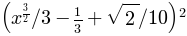

In [33]:
psi = g.subs(C1, L[1])
psi

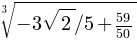

In [34]:
x0 = solve(Eq(psi, 0))[0]
x0

In [35]:
x0n = float(x0.n())
xn2 = np.linspace(x0n, 1.6)
wn2 = lambdify(x, psi, 'numpy')(xn2)

In [38]:
type(x0.n())

sympy.core.numbers.Float

<IPython.core.display.Javascript object>


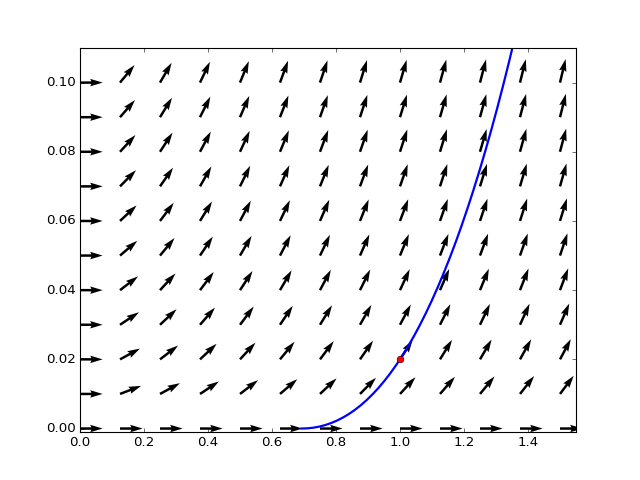

In [36]:
plt.quiver(X, Y, U, V, angles='xy')
plt.plot(xn2, wn2, 'b', linewidth=2)
plt.plot([1], [w], 'or')
plt.axis(ymin= -.001, ymax=.11, xmax=1.55);

## Graphen komplexer Funktionen

In [39]:
from mpl_toolkits.mplot3d import Axes3D

In [40]:
z = Symbol('z')
f = z**2

In [41]:
xn = np.linspace(-2, 2, 99)
yn = np.linspace(-2, 2, 99)
X, Y = np.meshgrid(xn, yn)
Z = X + 1j*Y

<IPython.core.display.Javascript object>


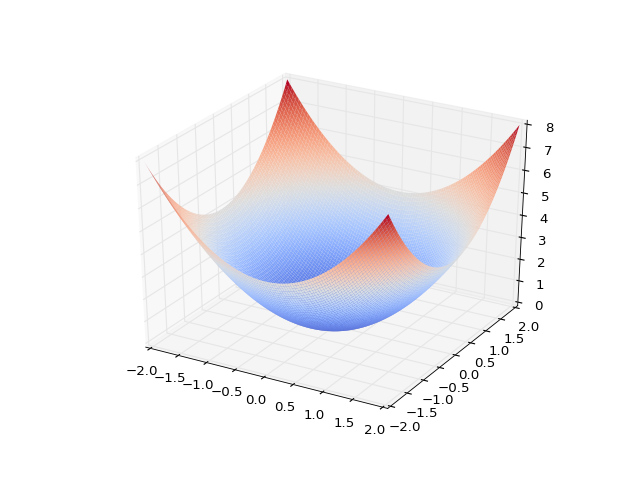

In [42]:
W = abs(Z**2)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, W, rstride=1, cstride=1, 
                cmap=plt.cm.coolwarm, linewidth=0);

In [44]:
r = np.linspace(0, 2)
phi = np.linspace(0, 2*np.pi, 100)
R, Phi = np.meshgrid(r, phi)
Z = R*np.exp(1j*Phi)
X = Z.real
Y = Z.imag

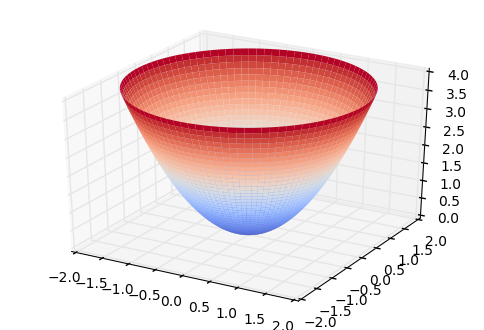

In [45]:
W = abs(Z**2)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, W, cmap=plt.cm.coolwarm, 
                cstride=1, rstride=1, linewidth=0);

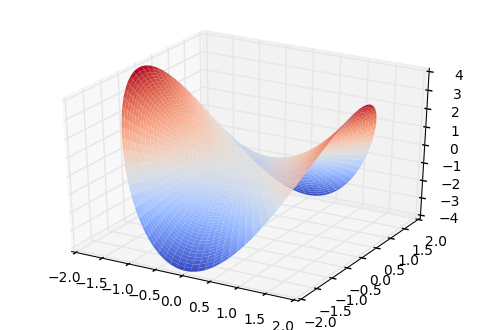

In [46]:
W = np.real(Z**2)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, W, cmap=plt.cm.coolwarm, 
                cstride=1, rstride=1, linewidth=0);

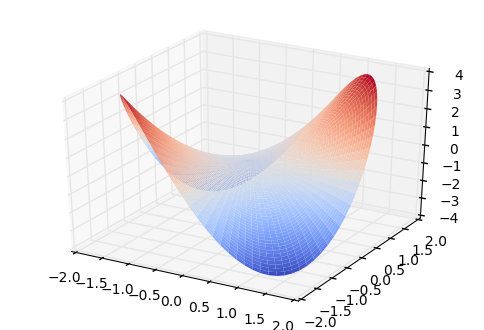

In [47]:
W = np.imag(Z**2)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, W, cmap=plt.cm.coolwarm, 
                cstride=1, rstride=1, linewidth=0);

Wir wollen dieses Bild nach dem Winkel von $z^2$ färben.

In [48]:
W = abs(Z**2)
Theta = np.angle(Z**2)

In [49]:
fc = plt.cm.hsv((Theta+np.pi)/2/np.pi)

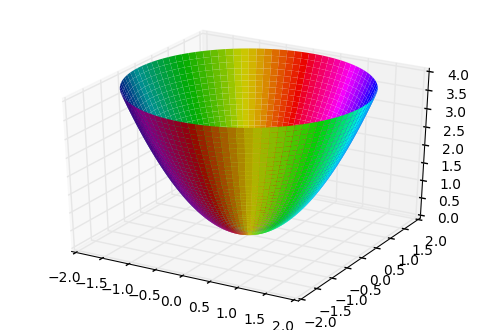

In [50]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, W, facecolors=fc, 
                     cstride=1, rstride=1, linewidth=0);

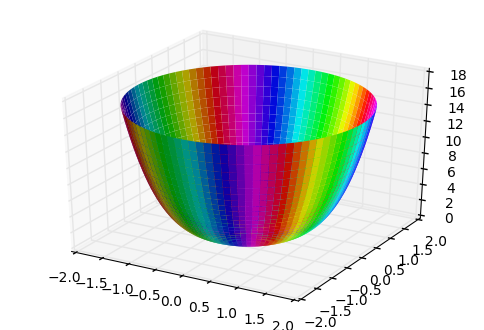

In [51]:
W = abs(Z**4)
Theta = np.angle(Z**4)
fc = plt.cm.hsv((Theta+np.pi)/2/np.pi)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, W, facecolors=fc, 
                     cstride=1, rstride=1, linewidth=0);

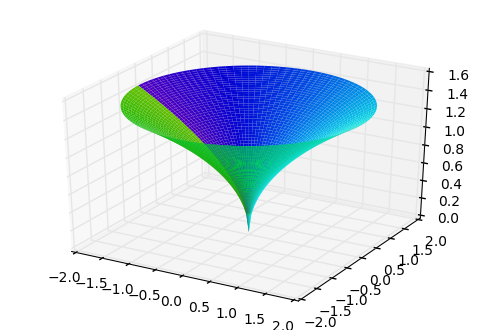

In [52]:
V = np.sqrt(Z)
W = abs(V)
Theta = np.angle(V)
fc = plt.cm.hsv((Theta+np.pi)/2/np.pi)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, W, facecolors=fc, 
                     cstride=1, rstride=1, linewidth=0);

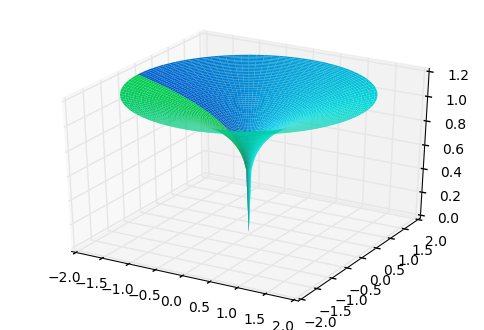

In [53]:
V = Z**0.2
W = abs(V)
Theta = np.angle(V)
fc = plt.cm.hsv((Theta+np.pi)/2/np.pi)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, W, facecolors=fc, 
                     cstride=1, rstride=1, linewidth=0);

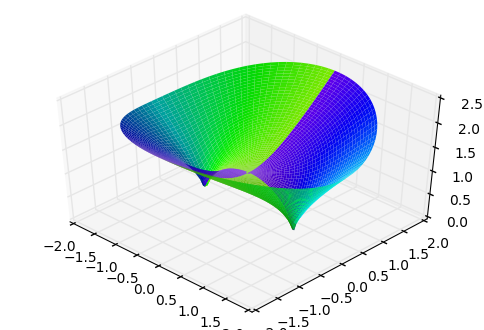

In [55]:
V = np.sqrt(Z**2-1)
W = abs(V)
Theta = np.angle(V)
fc = plt.cm.hsv((Theta+np.pi)/2/np.pi)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, W, facecolors=fc, 
                     cstride=1, rstride=1, linewidth=0)
ax.view_init(45, -46);

In [56]:
def h(z):
    if z.real > 0:
        return np.sqrt(z**2-1)
    else:
        return -np.sqrt(z**2-1)

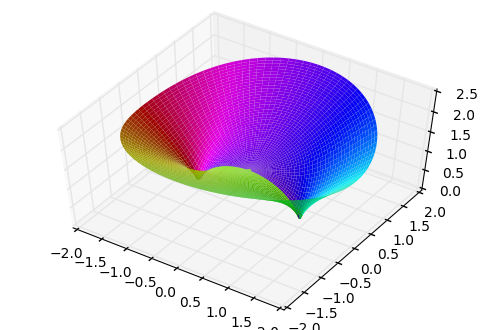

In [59]:
V = np.array([h(zz) for zz in Z.flatten()]).reshape(np.shape(Z))
W = abs(V)
Theta = np.angle(V)
fc = plt.cm.hsv((Theta+np.pi)/2/np.pi)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, W, facecolors=fc, 
                     cstride=1, rstride=1, linewidth=0)
ax.view_init(55, -56);

In [60]:
f = z/(1+z**4)
fn = lambdify(z, f)

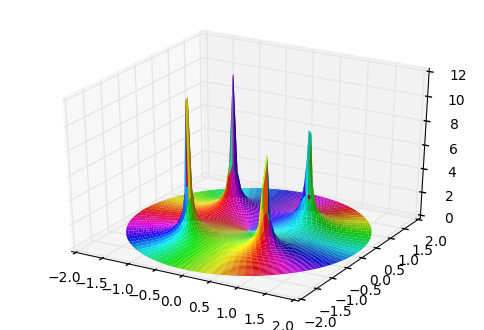

In [61]:
V = fn(Z)
W = abs(V)
Theta = np.angle(V)
fc = plt.cm.hsv((Theta+np.pi)/2/np.pi)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, W, facecolors=fc, 
                     cstride=1, rstride=1, linewidth=0);

Jetzt müssen wir triangulieren.

In [62]:
from scipy.spatial import Delaunay

In [63]:
r = np.linspace(0, 2)
phi = np.linspace(0, 2*np.pi, 99)
R, Phi = np.meshgrid(r, phi)
Z = R*np.exp(1j*Phi)
V = fn(Z)
W = abs(V)
B = W < 3
Rf = R[B].flatten()
Phi_f = Phi[B].flatten()
Zf = Z[B].flatten()
Xf = Zf.real
Yf = Zf.imag
Vf = V[B].flatten()
Wf = abs(Vf)
Theta_f = np.angle(Vf)

In [66]:
dreiecke = Delaunay(np.array([Rf, Phi_f]).T)

In [68]:
#dreiecke.simplices

In [69]:
Theta_d = np.array([Theta_f[vert[0]] for vert in dreiecke.simplices ])
fc = plt.cm.hsv((Theta_d+np.pi)/2/np.pi)

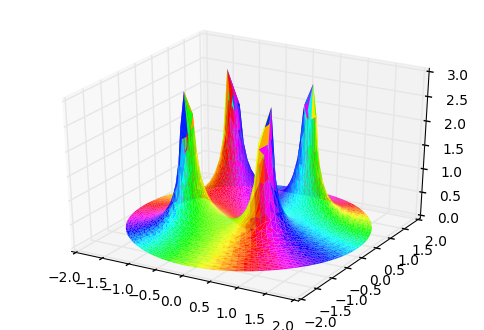

In [70]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
pc = ax.plot_trisurf(Xf, Yf, Wf, triangles=dreiecke.simplices, linewidth=0)
pc.set_facecolors(fc)

Verfeinerung an einem Pol

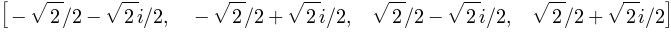

In [71]:
d = denom(f)
tmp = solve(d)
tmp

In [72]:
z0 = tmp[-1]

In [74]:
r_lokal = np.linspace(.06, .1, 4)
phi_lokal = np.linspace(0, 2*np.pi, 30)
R_lokal, Phi_lokal = np.meshgrid(r_lokal, phi_lokal)
Z2 = complex(z0.n()) + R_lokal*np.exp(1j*Phi_lokal)
R2 = abs(Z2).flatten()
Phi2 = np.angle(Z2).flatten()

In [75]:
R3 = np.array(list(Rf) + list(R2))
Phi3 = np.array(list(Phi_f) + list(Phi2))
Z3 = R3 * np.exp(1j*Phi3)
X3 = Z3.real
Y3 = Z3.imag
V3 = fn(Z3)
W3 = abs(V3)
Theta_3 = np.angle(V3)

In [76]:
d3 = Delaunay(np.array([R3, Phi3]).T)

In [77]:
Theta_3d = np.array([Theta_3[vert[0]] for vert in d3.simplices ])
fc3 = plt.cm.hsv((Theta_3d+np.pi)/2/np.pi)

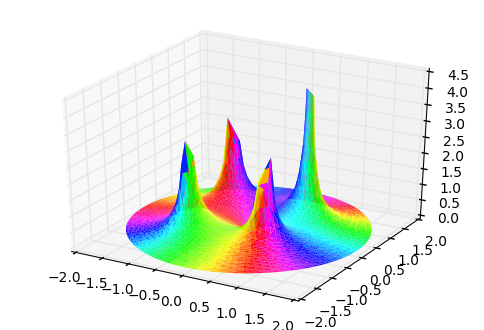

In [78]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
pc = ax.plot_trisurf(X3, Y3, W3, triangles=d3.simplices, linewidth=0)
pc.set_facecolors(fc3)